# **Cardiovascular Prediction using Logistic Regression**

# Introduction

Coronary heart disease (CHD) is the leading cause of death in the US, responsible for about 610,000 deaths annually, which is one in four deaths. Globally, it ranks as the third leading cause of death, accounting for 17.8 million deaths each year. The healthcare costs for treating CAD in the US exceed $200 billion annually, though it is largely preventable.


Given the significant healthcare burden of CHD, identifying modifiable and non-modifiable risk factors has helped reduce mortality rates over the past forty years. Advances in medical technology and risk factor identification have significantly decreased CAD deaths. This highlights the importance of developing models to predict CHD risk, as they can further reduce the economic and disease burden by enabling early intervention.

### **Goal**

Given basic health parameters, predict the presence of 10-year risk of coronary heart disease (CHD) using a logisitic regression model.

Dataset Description:

Demographic:
- **Sex**: male or female ("M" or "F")
- **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical (History):
- **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
- **Diabetes**: whether or not the patient had diabetes (Nominal)

Medical (Current):
- **Tot Chol**: total cholesterol level (Continuous)
- **Sys BP**: systolic blood pressure (Continuous)
- **Dia BP**: diastolic blood pressure (Continuous)
- **BMI**: Body Mass Index (Continuous)
- **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values.)
- **Glucose**: glucose level (Continuous)

Predict variable (desired target):
- **10 year risk of coronary heart disease (CHD)**: (binary: “1” means “Yes”, “0” means “No”)


Source: https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea/data

# Project Outline

- ### Load Data

- ### Data Cleaning

- ### Exploratory Data Analysis

- ### Data Preparation

- ### Model Training and Evaluation

- ### Conclusion

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from scipy.stats import ttest_ind
from statsmodels.tools import add_constant as add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from IPython.display import display


from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

**Set functions for consistent formatting**

## 1. Load Data


In [2]:
cardio_df = pd.read_csv("train.csv")

## Initial Checks
  - Data types
  - Basic statistics

Goal: Analyze and understand the underlying patterns, relationships and structures within the dataset.

Objectives:
* Familiarization with data structure, variables and types
* Data cleaning: detect and handle missing values, outliers and anomalies. Ensure data quality and consistency
* Data visualization: Use graphical techniques to visualize distributions, relationships and trends
* Feature selection: Identify important features and relationships that may influence analysis/model building
* Hypothesis generation: Formulate hypotheses or questions that can be tested through further statistical analysis/predictive modeling

In [3]:
cardio_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
cardio_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


**Check data types**

In [5]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


**Check for Missing Values**

In [6]:
print(cardio_df.isnull().sum().sort_values(ascending=False))

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64


In [7]:
missing_count = cardio_df.isnull().any(axis=1).sum()
print('Number of rows with missing values:', missing_count)
percentage = (missing_count / len(cardio_df)) * 100
print('% missing:', percentage)

Number of rows with missing values: 463
% missing: 13.657817109144544


**Check unique entries per feature**

In [8]:
cardio_df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [9]:
cardio_df.duplicated().sum()

0

In [10]:
print(cardio_df.shape)

(3390, 16)


In [11]:
summary_stats = cardio_df.describe()
mean_max_min = summary_stats.loc[['mean', 'max', 'min']]
print(mean_max_min)

            age  education  cigsPerDay    BPMeds  prevalentStroke  \
mean  49.542183   1.970936    9.069477  0.029886          0.00649   
max   70.000000   4.000000   70.000000  1.000000          1.00000   
min   32.000000   1.000000    0.000000  0.000000          0.00000   

      prevalentHyp  diabetes     totChol      sysBP       diaBP        BMI  \
mean      0.315339  0.025664  237.074284  132.60118   82.883038  25.794964   
max       1.000000  1.000000  696.000000  295.00000  142.500000  56.800000   
min       0.000000  0.000000  107.000000   83.50000   48.000000  15.960000   

       heartRate    glucose  TenYearCHD  
mean   75.977279   82.08652    0.150737  
max   143.000000  394.00000    1.000000  
min    45.000000   40.00000    0.000000  


In [12]:
cardio_df.value_counts('TenYearCHD')

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [13]:
cardio_df['TenYearCHD'].sum()/cardio_df['TenYearCHD'].count()

0.15073746312684366

## Initial correlation exploration

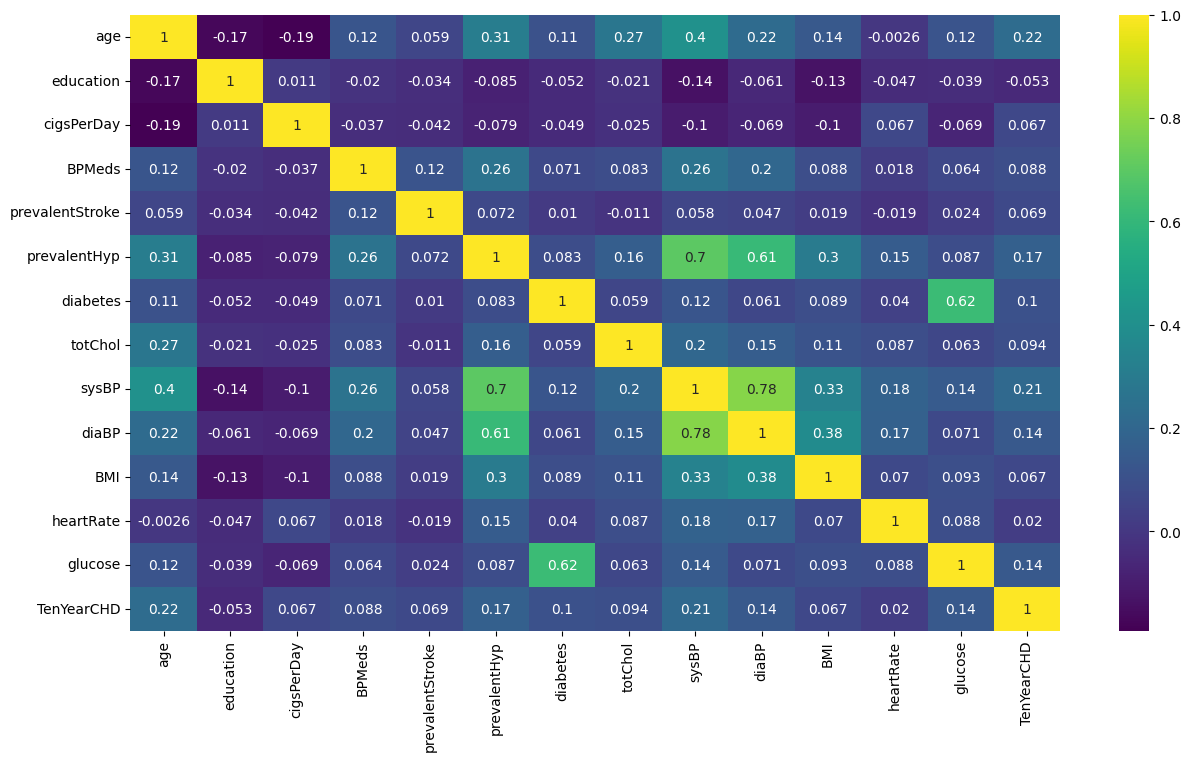

In [14]:
plt.figure(figsize=(15,8))
numerical_cardio_df = cardio_df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_cardio_df.corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.show()  

These strongly and moderately correlated variables (e.g. sysBP and diaBP) are worth prioritizing for feature selection.

## 2. Data Cleaning

### 2.1 Handling Missing Values

Drop education column due to missing feature explanation and low correlation with TenyearCHD

In [15]:
cardio_df.drop(['education'],axis=1,inplace=True)

Confirm education column was dropped

In [16]:
print(cardio_df.columns)

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


Drop rows with missing values since 11% is low and it is desirable to maintain integrity of the data 

In [17]:
cardio_df.dropna(axis=0,inplace=True)

Confirm rows with missing values were dropped

In [18]:
num_entries = cardio_df.shape[0]
print("Number of entries:", num_entries)

Number of entries: 3004


### 2.2 Correcting Data Types and Formatting

Change object features ('sex' and 'is_smoking') to numerical to be included in future analysis

In [19]:
unique_sex = cardio_df['sex'].unique()
print("Unique entries in 'sex' column:", unique_sex)

unique_smoking = cardio_df['is_smoking'].unique()
print("Unique entries in 'is_smoking' column:", unique_smoking)


Unique entries in 'sex' column: ['M' 'F']
Unique entries in 'is_smoking' column: ['NO' 'YES']


In [20]:
sex_code = {'M' : 0, 'F': 1}
cardio_df['sex_code'] = cardio_df.sex.map(sex_code)

smoking_code = {'NO' : 0, 'YES': 1}
cardio_df['smoking_code'] = cardio_df.is_smoking.map(smoking_code)

Ensure columns were added correctly 

In [21]:
selected_columns = cardio_df[['sex', 'is_smoking', 'sex_code', 'smoking_code']]

print("First 4 rows:")
print(selected_columns.head(4))

print("Last 4 rows:")
print(selected_columns.tail(4))


First 4 rows:
  sex is_smoking  sex_code  smoking_code
1   M         NO         0             0
2   F        YES         1             1
3   M        YES         0             1
4   F        YES         1             1
Last 4 rows:
     sex is_smoking  sex_code  smoking_code
3385   F         NO         1             0
3386   F         NO         1             0
3387   M        YES         0             1
3389   F         NO         1             0


## 2.3 Investigating for Outliers

In [22]:
print(cardio_df.describe())

               age   cigsPerDay       BPMeds  prevalentStroke  prevalentHyp  \
count  3004.000000  3004.000000  3004.000000      3004.000000   3004.000000   
mean     49.521305     9.078562     0.030293         0.005992      0.314913   
std       8.595076    11.890855     0.171421         0.077189      0.464559   
min      32.000000     0.000000     0.000000         0.000000      0.000000   
25%      42.000000     0.000000     0.000000         0.000000      0.000000   
50%      49.000000     0.000000     0.000000         0.000000      0.000000   
75%      56.000000    20.000000     0.000000         0.000000      1.000000   
max      70.000000    70.000000     1.000000         1.000000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  3004.000000  3004.000000  3004.000000  3004.000000  3004.000000   
mean      0.027297   237.222370   132.591711    82.923103    25.824041   
std       0.162974    45.267516    22.270882    12.038348     4.12

### Outlier Analysis: Medical Plausibility
#### According to sources below, none of the potential outliers are medically impossible, thus were included unchanged in the dataset to maintain data integrity

### Cigarettes Per Day (`cigsPerDay`)
- **70 cigarettes per day** is extremely high but not medically impossible, equating to about 3.5 packs per day (assuming 20 cigarettes per pack).

### Total Cholesterol (`totChol`)
- **696 mg/dL** is exceptionally high, typically observed in severe cases of familial hypercholesterolemia or other metabolic disorders, thus not impossible.

### Systolic Blood Pressure (`sysBP`)
- **295 mmHg** indicates severe hypertension, which, while rare and critical, can occur, particularly in acute conditions or with severe chronic hypertension.

### Diastolic Blood Pressure (`diaBP`)
- **142.5 mmHg** is also very high. Like systolic pressure, this level indicates severe hypertension, potentially leading to hypertensive crises but remains within medical possibility.

### Body Mass Index (`BMI`)
- **56.8** indicates extreme obesity. Such a BMI is associated with significant health risks but is seen in clinical settings, indicating it's not medically impossible.

### Heart Rate (`heartRate`)
- **143 beats per minute** can occur under conditions such as stress, physical exertion, or specific health conditions like tachycardia. It is high but not impossible.

### Glucose
- **394 mg/dL** reflects severe hyperglycemia, often seen in cases like unmanaged diabetes or diabetic ketoacidosis. It represents a critical but not impossible medical scenario.

## 3. Exploratory Data Analysis (EDA)
Goal: Analyze and understand the underlying patterns, relationships and structures within the dataset.

Objectives:
* Data visualization: Use graphical techniques to visualize distributions, relationships and trends
* Feature selection: Identify important features and relationships that may influence analysis/model building
* Hypothesis generation: Formulate hypotheses or questions that can be tested through further statistical analysis/predictive modeling

**Exploring Distributions**

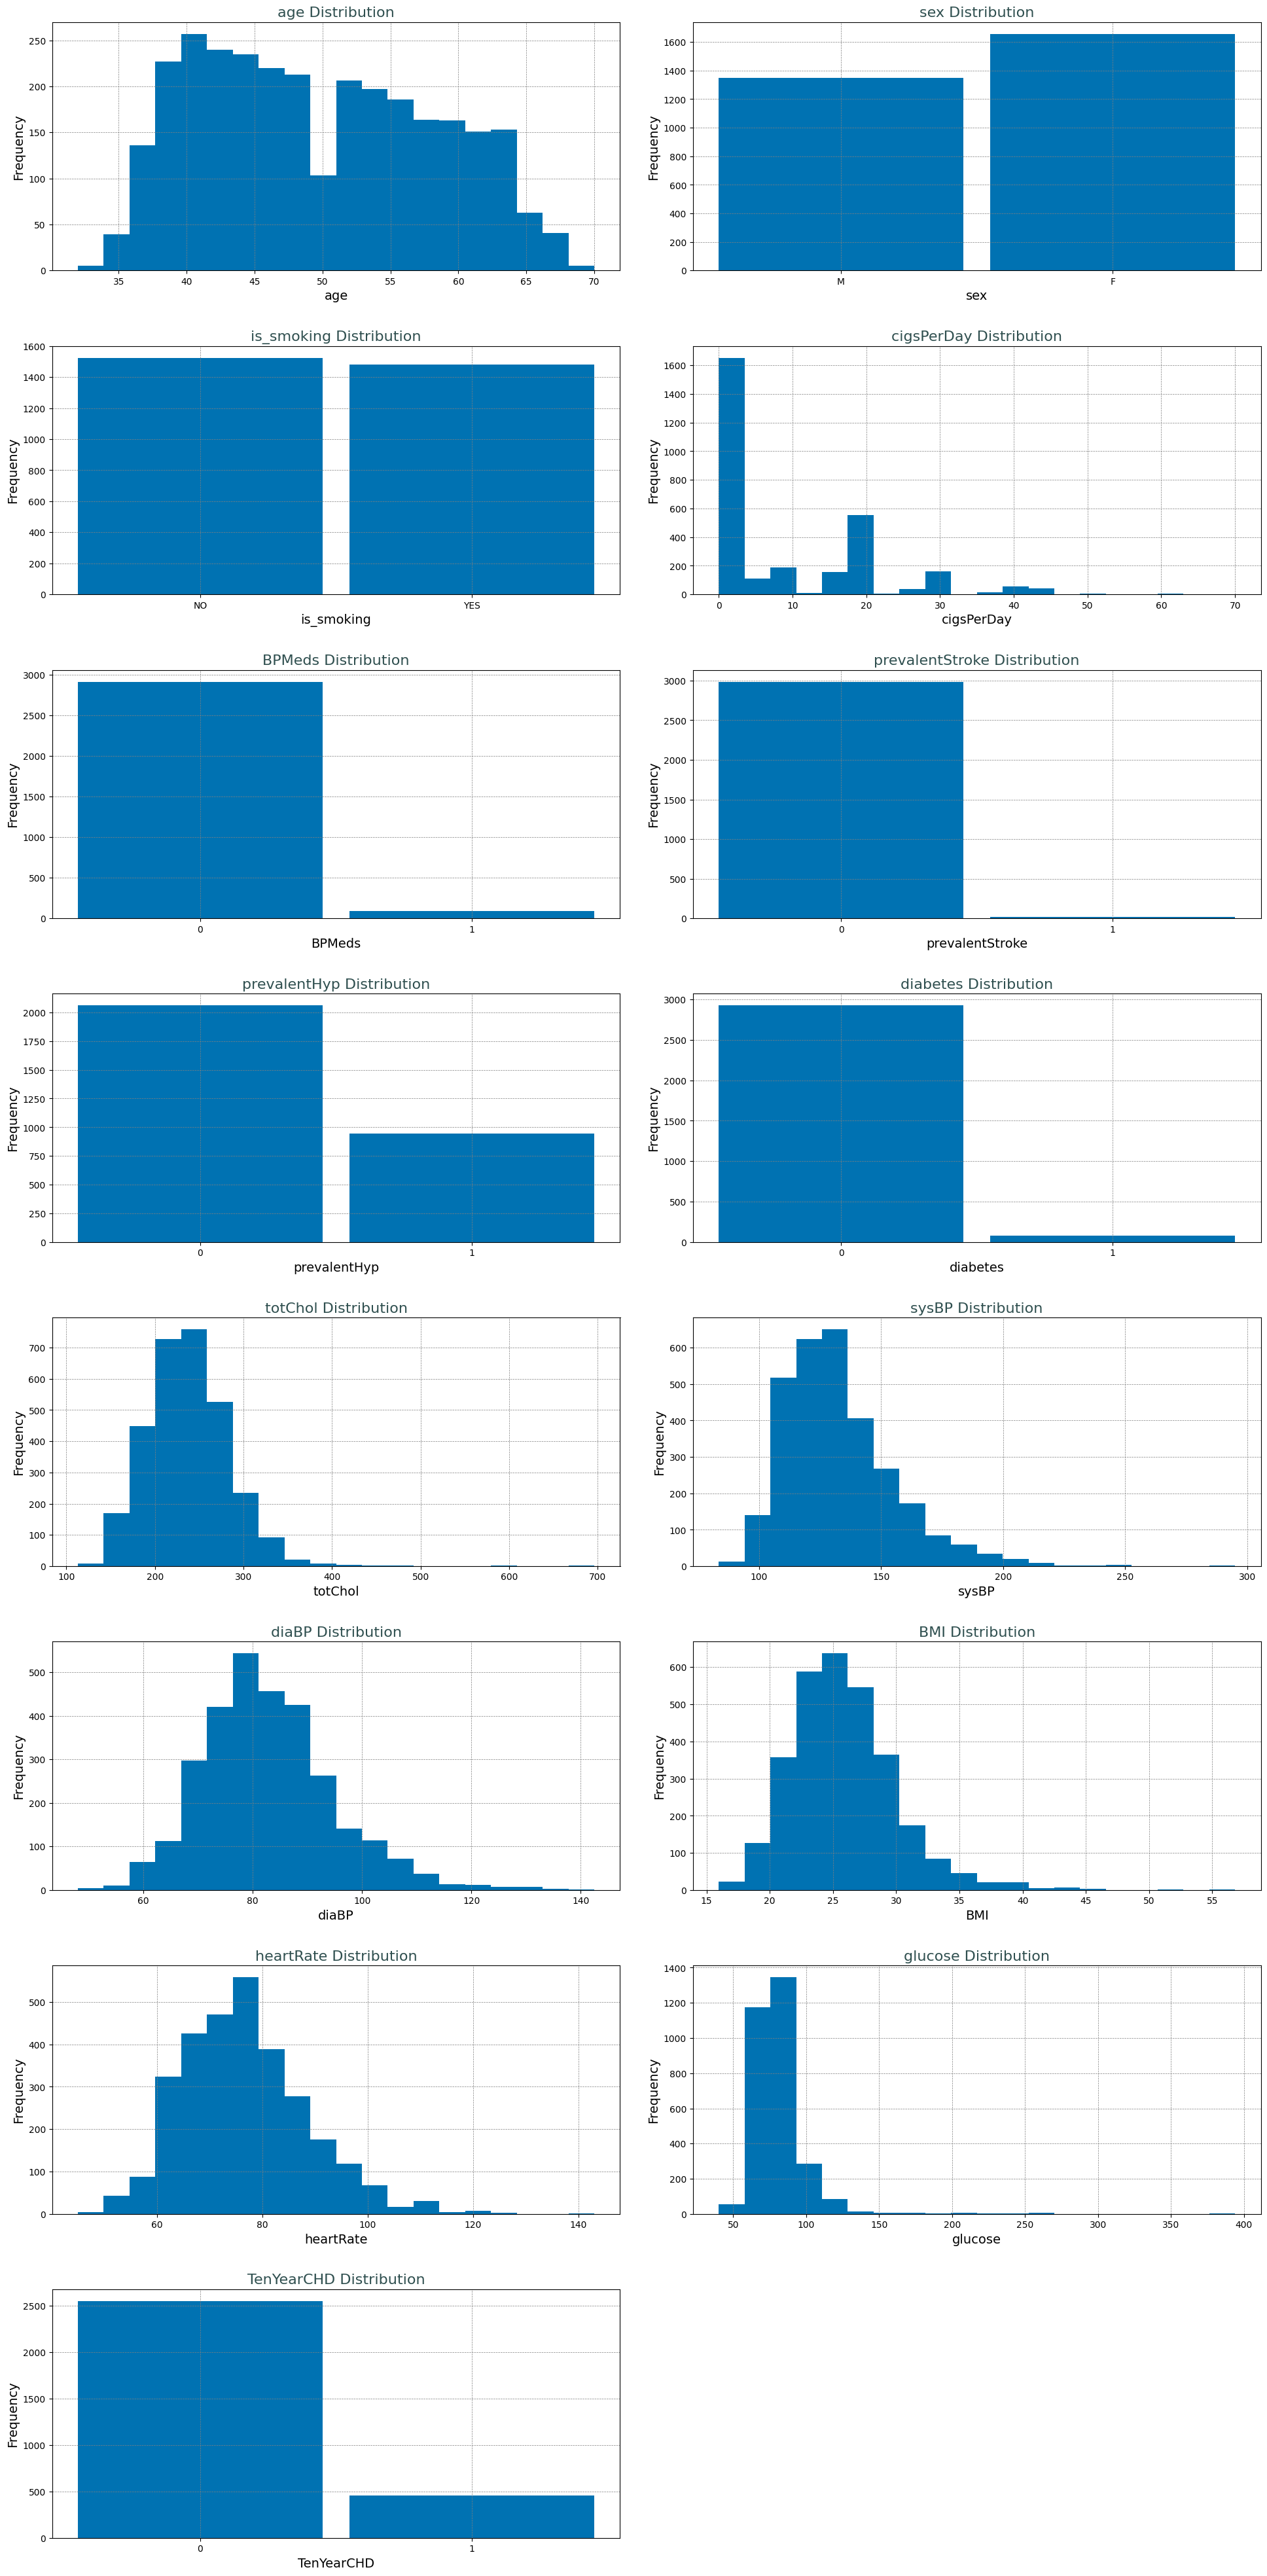

In [ ]:
plt.style.use('seaborn-v0_8-colorblind')

def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(cols * 10, rows * 5))  
    
    features = [feat for feat in features if feat not in ['sex_code', 'smoking_code']]
    binary_features = ['sex', 'is_smoking', 'TenYearCHD', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds']
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        if feature in binary_features or dataframe[feature].nunique() == 2:  
            bars = dataframe[feature].hist(bins=[-0.5, 0.5, 1.5], ax=ax, rwidth=0.9)
            ax.set_xticks([0, 1])
        else:
            bars = dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature + " Distribution", color='darkslategray', fontsize=16)
        ax.set_xlabel(feature, fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

    fig.tight_layout(pad=3.0)
    plt.show()

num_features = len([col for col in cardio_df.columns if col not in ['sex_code', 'smoking_code']])
num_rows = (num_features + 1) // 2  
draw_histograms(cardio_df, cardio_df.columns, num_rows, 2)


**Observations**

**Several of the features do not have normal distributions, including age, sysBP and diaBP**. Because **logistic regression models assume normal distribution**, I considered applying log transformation to the data. However, some medical literature states that the application of logarithmic transformation generally does not significantly reduce data variability nor align the data more closely with a normal distribution. Furthermore, the outcomes of conventional statistical analyses conducted on log-transformed data may not be pertinent to the data in its original, non-transformed state.

## Explore Variable Correlations

| Absolute Magnitude of the Observed Correlation Coefficient | Interpretation          |
|------------------------------------------------------------|-------------------------|
| 0.00 - 0.10                                                | Negligible correlation  |
| 0.10 - 0.39                                                | Weak correlation        |
| 0.40 - 0.69                                                | Moderate correlation    |
| 0.70 - 0.89                                                | Strong correlation      |
| 0.90 - 1.00                                                | Very strong correlation |

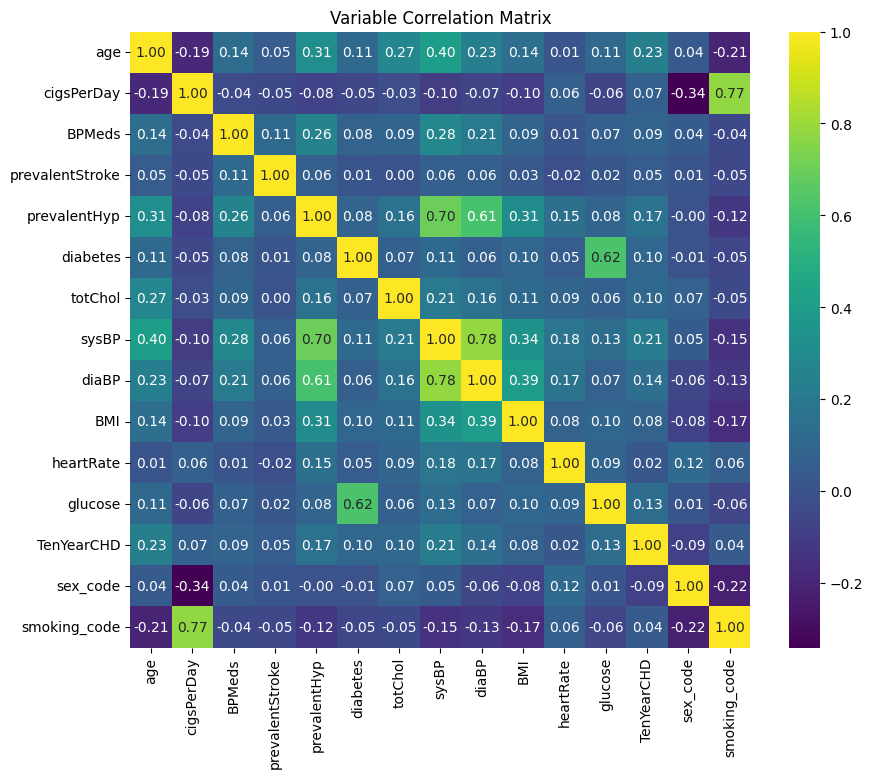

In [ ]:
numeric_cardio_df = cardio_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cardio_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix')
plt.show()

## Insights from Correlation Matrix:

### Strong Correlations:

- **sysBP and diaBP**: Very strong correlation of **0.78**, reflecting their common role in blood pressure measurement.

### Moderate Correlations:

- **Age and sysBP**: Significant correlation of **0.40**, indicative of increasing systolic blood pressure with age.
- **Age and prevalentHyp**: Moderate correlation of **0.31**, showing increasing hypertension prevalence with age.
- **sysBP and prevalentHyp**: Strong correlation of **0.70**, suggesting higher systolic pressure is often seen with hypertension.
- **BMI and diaBP**: Moderate correlation of **0.39**, suggesting that higher body weight may influence blood pressure levels.

### Health Outcomes:

- **TenYearCHD**: Moderate correlations with **age (0.23)**, **sysBP (0.21)**, and **glucose (0.14)**, indicating predictive factors for coronary heart disease risk over ten years.
- **cigsPerDay and TenYearCHD**: Weak correlation of **0.07**, showing a slight influence of smoking on heart disease risk.

### Negative Correlations:

- **cigsPerDay and age**: Negative correlation of **-0.19** suggests younger individuals tend to smoke more, or older individuals reduce smoking.
- **sex_code and cigsPerDay**: Strong negative correlation of **-0.34** indicates males may be more likely to smoke than females.

### Diabetes Related:

- **Glucose and diabetes**: Very strong correlation of **0.62**, highlighting the direct impact of glucose levels on diabetes.

### Other Notable Points:

- **BMI**: Shows weak negative correlations with **cigsPerDay (-0.10)** and **smoking_code (-0.17)**, indicating smokers might have a lower BMI.
- **heartRate**: Displays a very weak positive correlation with **smoking_code (0.06)** and a negligible negative correlation with **prevalentStroke (-0.02)**.


## Implications for Variable Inclusion in Logistic Regression

### Significant Predictors
- **Age and sysBP (systolic blood pressure)**: Both are significant predictors of CHD, showing moderate to strong correlations with the outcome variable (TenYearCHD). Age correlates with sysBP at **0.40** and with TenYearCHD at **0.23**.

- **Glucose Levels**: Given its strong correlation with diabetes (**0.62**) and moderate correlation with TenYearCHD (**0.13**), glucose is a key predictor, especially considering diabetes as a major risk factor for heart disease.

### Avoid Multicollinearity
- **sysBP and diaBP**: Highly correlated (**0.78**). Prefer sysBP for inclusion because it is a stronger predictor for CHD risk, with a correlation of **0.21** with TenYearCHD compared to **0.14** for diaBP.

- **cigsPerDay and smoking_code**: Highly correlated (**0.78**), suggesting redundancy if both are included.

### Possible Synergistic Effects
- **Interactions between Age and Blood Pressure**: The interaction could affect CHD risk variably across different age groups, considering both age and sysBP independently correlate with CHD.

- **Smoking and Cholesterol Metabolism**: While the direct correlation between cigsPerDay and totChol isn't strong, considering the biological plausibility of smoking influencing cholesterol metabolism could yield deeper insights into CHD risk.

- **BMI and Diabetes**: While the direct correlations with CHD are weaker, considering BMI in relation to diabetes could provide valuable insights into overall metabolic health and its impact on CHD.



## Monitoring for difference in correlations among smoker vs. non-smoker groups

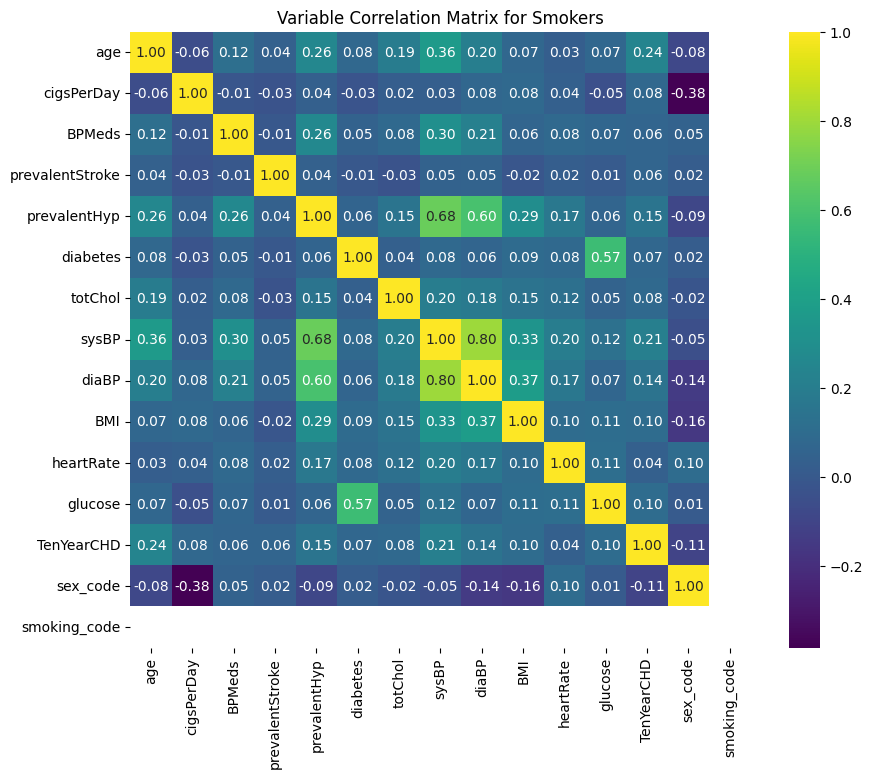

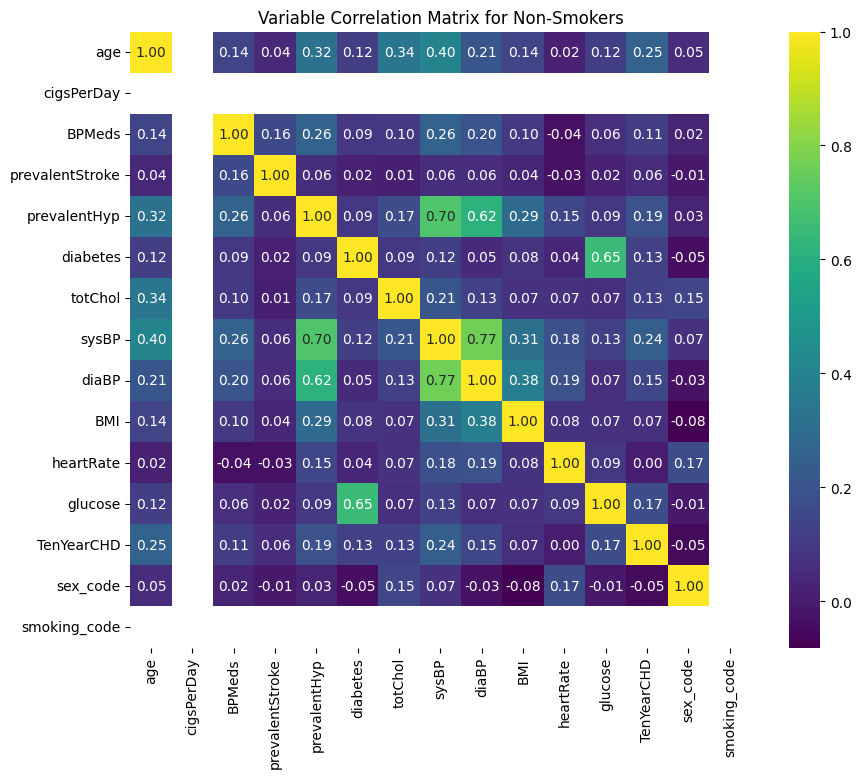

In [25]:
numeric_cardio_df = cardio_df.select_dtypes(include=[np.number])

smokers_df = numeric_cardio_df[numeric_cardio_df['smoking_code'] == 1]
non_smokers_df = numeric_cardio_df[numeric_cardio_df['smoking_code'] == 0]

correlation_matrix_smokers = smokers_df.corr()
correlation_matrix_non_smokers = non_smokers_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_smokers, annot=True, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix for Smokers')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_non_smokers, annot=True, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix for Non-Smokers')
plt.show()

## Insights from Correlation Matrices

### Age and Blood Pressure:
- **Smokers and Non-Smokers**: Age consistently shows a strong positive correlation with both systolic (sysBP) and diastolic blood pressure (diaBP) across both groups. 
  - **Non-Smokers**: The correlation is slightly stronger, indicating a more pronounced effect of age on blood pressure among non-smokers.

### Diabetes and Glucose:
- **Non-Smokers**: A stronger correlation between diabetes and glucose levels suggests that in non-smokers, the impact of diabetes on glucose levels might be more direct and less influenced by other factors compared to smokers.

### Prevalent Hypertension:
- **Non-Smokers**: There is a stronger correlation between prevalent hypertension and blood pressure measurements, suggesting that the relationship is more pronounced in non-smokers.

## Implications for Logistic Regression Model

Given the observed consistency in the relationships between key health indicators and coronary heart disease (CHD) risk factors across both smokers and non-smokers:
- **Unified Model Justification**: The correlation matrices indicate that predictors exhibit similar strengths and patterns of association with CHD across different smoking statuses.
- **Modeling Strategy**: Using a single logistic regression model is justified. This approach simplifies the modeling process, enhances statistical power by utilizing the entire dataset, and ensures comprehensive insights into factors influencing CHD risk.
- **Interaction Terms**: Including interaction terms for smoking status within the single model can account for any subtle differences, ensuring robust and nuanced analysis without the need for separate models.


## Investigate for correlation differences among 3 distinct age groups: 32-44, 45-57, 58-70 

In [26]:
age_range = cardio_df['age'].agg(['min', 'max'])
print(age_range)


min    32
max    70
Name: age, dtype: int64


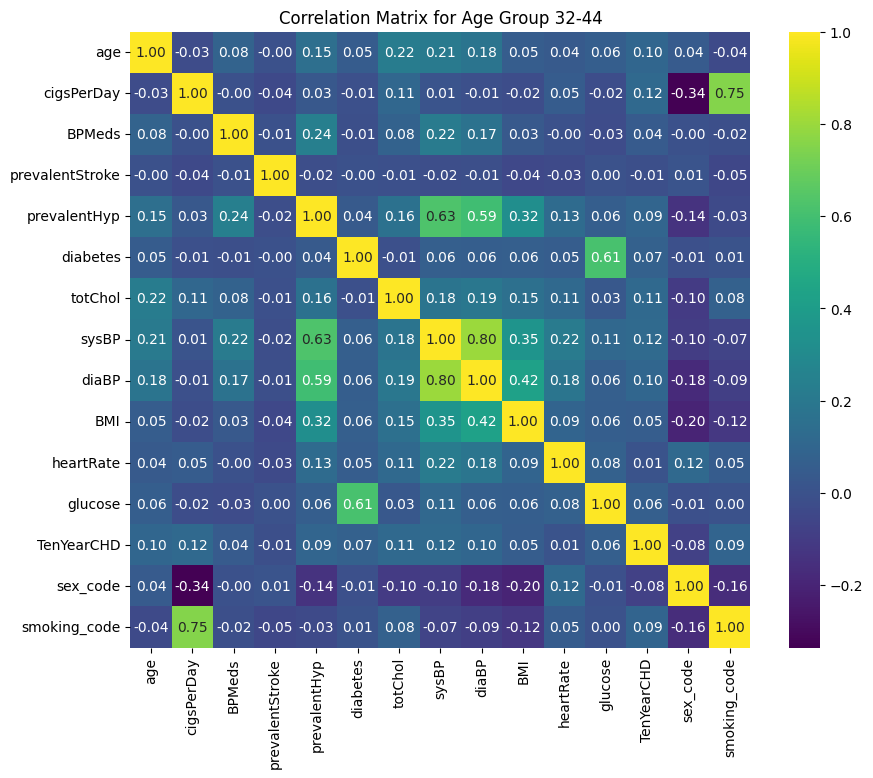

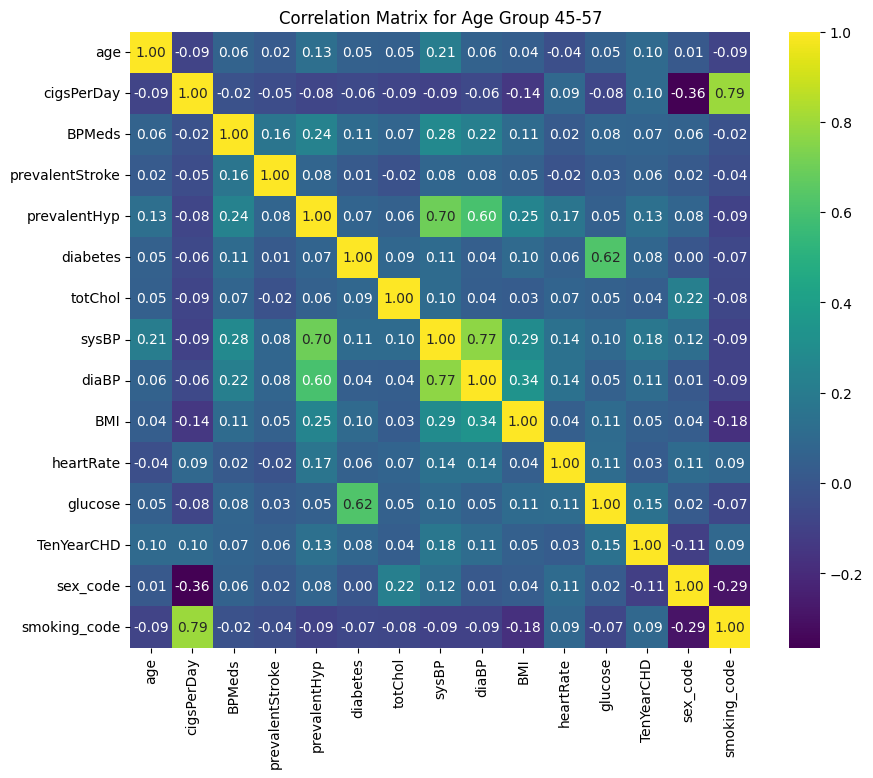

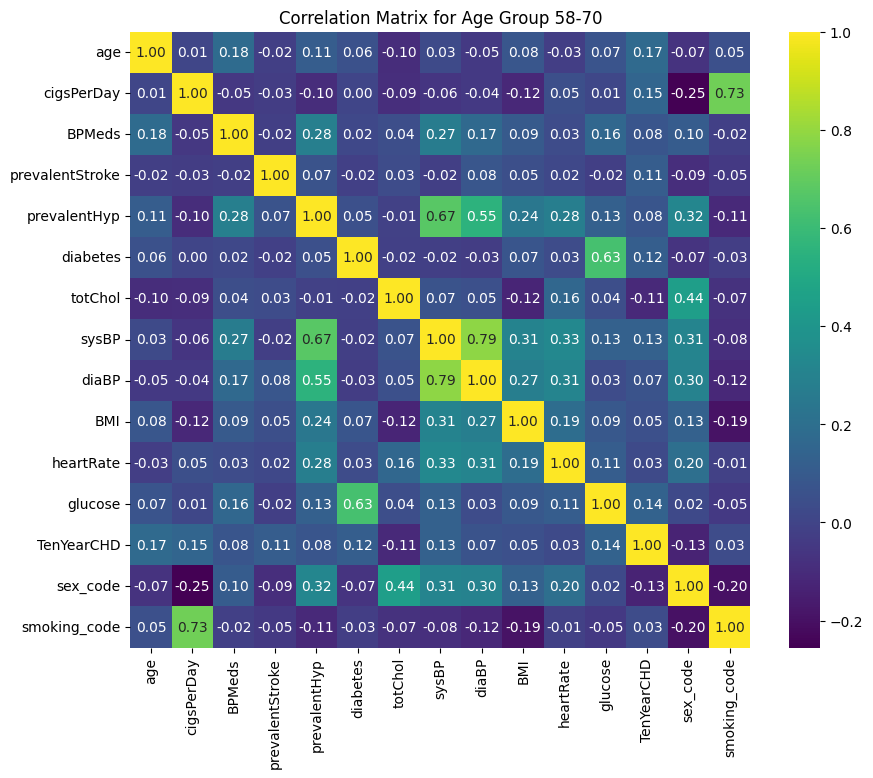

In [27]:
median_age = cardio_df['age'].median()
iqr_age = cardio_df['age'].quantile(0.75) - cardio_df['age'].quantile(0.25)

age_bins = [median_age + x * iqr_age for x in [-1.0, 0, 1.0, 1.5]]

age_labels = ['32-44', '45-57', '58-70']

cardio_df['age_group'] = pd.cut(cardio_df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

for group in age_labels:
    group_df = cardio_df[cardio_df['age_group'] == group]
    numeric_group_df = group_df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_group_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
    plt.title(f'Correlation Matrix for Age Group {group}')
    plt.show()


## Insights from Correlation Matrices by Age Groups

### Summary of Main Findings:

- **Age and Blood Pressure:**
  - Consistently strong correlation between age and blood pressure (sysBP and diaBP) across all age groups. The strength of these relationships shows a slight increase with age, particularly notable in the 58-70 group with sysBP and diaBP correlations at 0.79 and 0.79, respectively.

- **Smoking Habits:**
  - Smoking shows varied correlations with other health factors. Interestingly, the degree of smoking (cigarettes per day) has a high correlation with smoking_code in the younger age group, which diminishes with age.

- **Diabetes and Glucose Levels:**
  - The correlation between diabetes and glucose levels remains robust across all age groups. It is particularly strong in the oldest age group with a correlation of 0.63, underscoring the consistent impact of glucose management on diabetes.

- **BMI and Blood Pressure:**
  - A noticeable relationship between BMI and blood pressure metrics across all groups, particularly strong in the oldest age group with BMI and sysBP correlation at 0.31 and BMI and diaBP at 0.27. This indicates the role of body weight in cardiovascular health, which persists across all age groups.

- **Cholesterol Levels:**
  - Total cholesterol shows consistent correlations with blood pressure and other cardiovascular risk factors across the different age groups, with moderate correlations observed in the middle age group.

### Model Recommendations:

Given the overall consistency in the key relationships across different age groups, a **single logistic regression model encompassing the entire dataset is advisable**. This approach allows for a comprehensive analysis that captures the influence of various predictors on the outcome across the entire age spectrum without the need for segmenting by age. Incorporating age as a continuous variable or testing its interactions with other predictors in the model can sufficiently account for any age-specific variations in the effects. This strategy enhances model simplicity and statistical power while providing a holistic view of the factors influencing health outcomes.


## Explore Relationships using PairPlots

**Recall from Health Outcomes discussed earlier**:

- **TenYearCHD**: Moderate correlations with **age (0.23)**, **sysBP (0.21)**, and **glucose (0.14)**, indicating predictive factors for coronary heart disease risk over ten years.
- **cigsPerDay and TenYearCHD**: Weak correlation of **0.07**, showing a slight influence of smoking on heart disease risk.

## PairPlots exploring features positively correlated with TenYearCHD

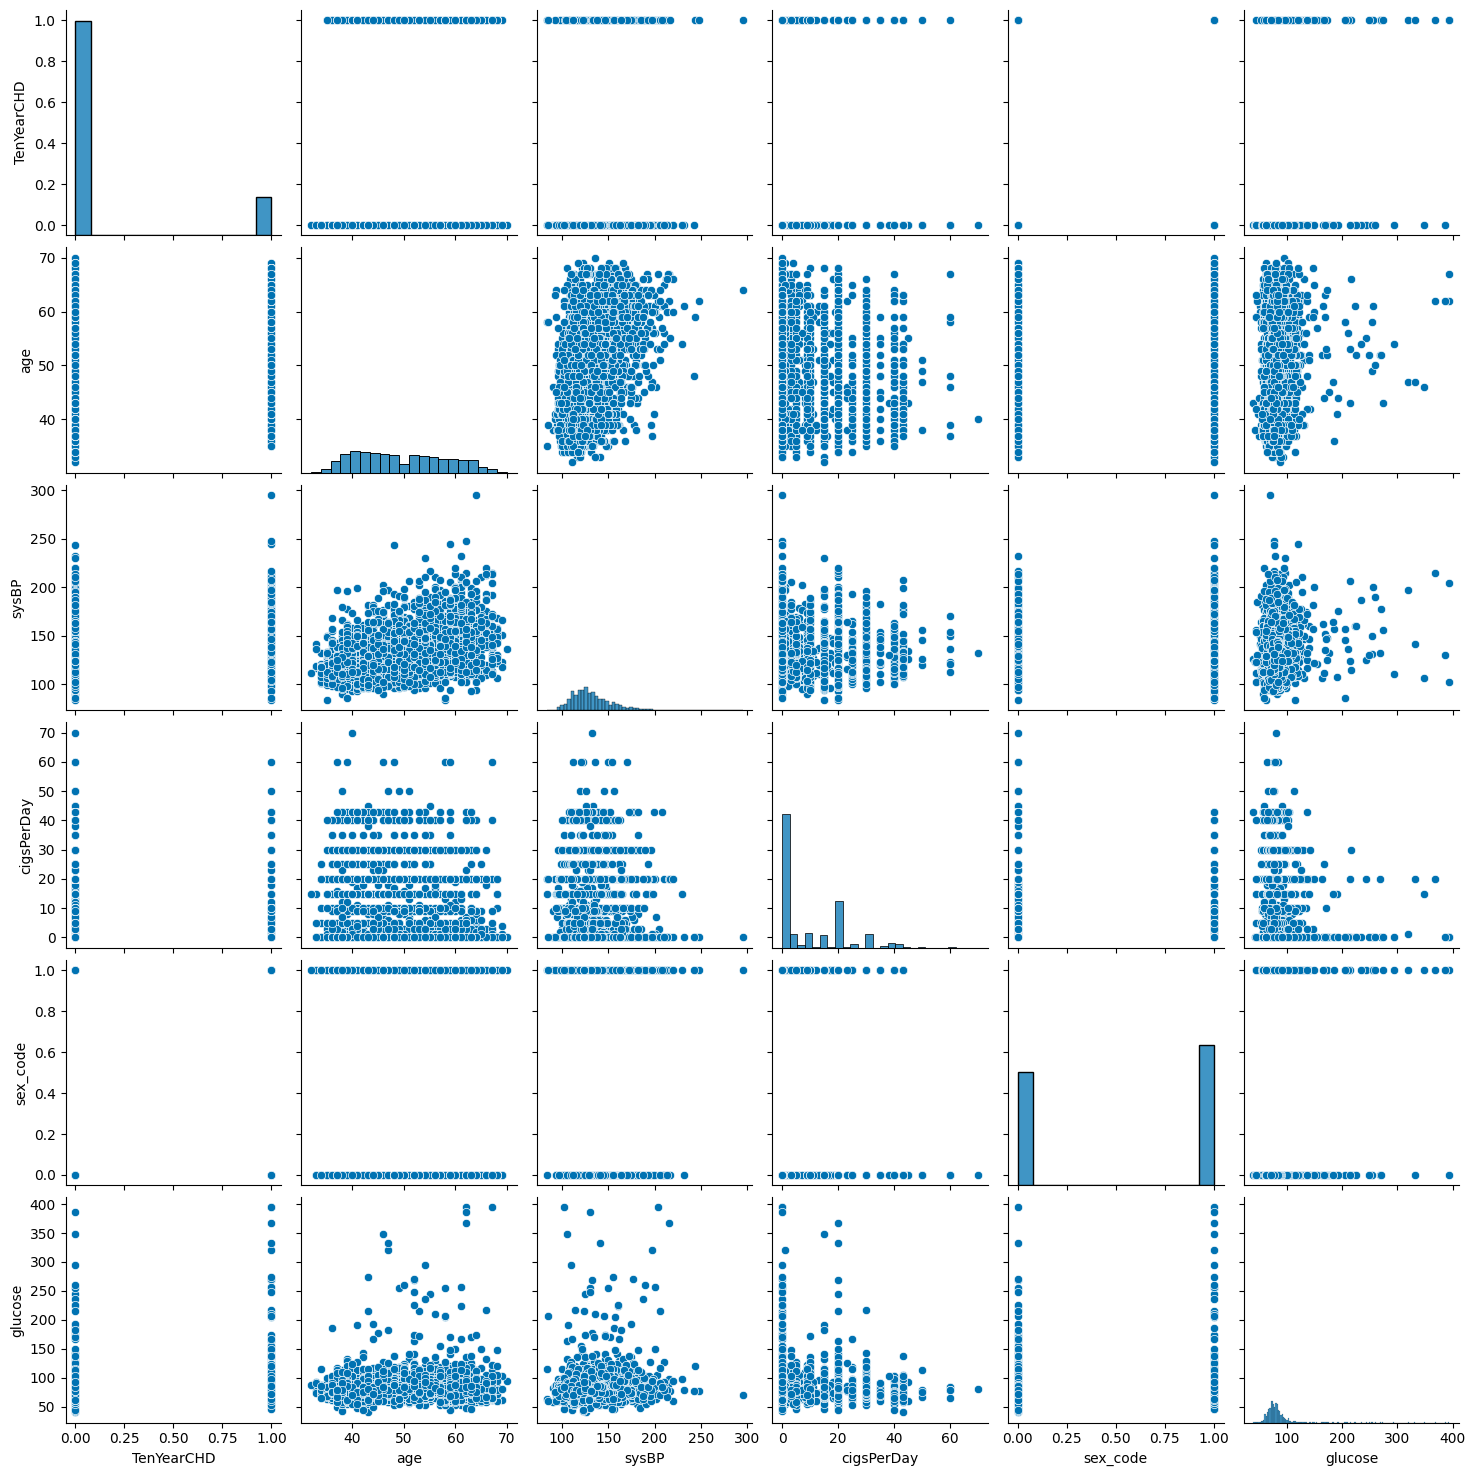

In [28]:
columns_of_interest = ['TenYearCHD', 'age', 'sysBP', 'cigsPerDay', 'sex_code', 'glucose']
filtered_df = cardio_df[columns_of_interest]

interestpairplot = sns.pairplot(filtered_df)

plt.show()


## PairPlots exploring features positively correlated with TenYearCHD with color coding by risk presence

C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The 

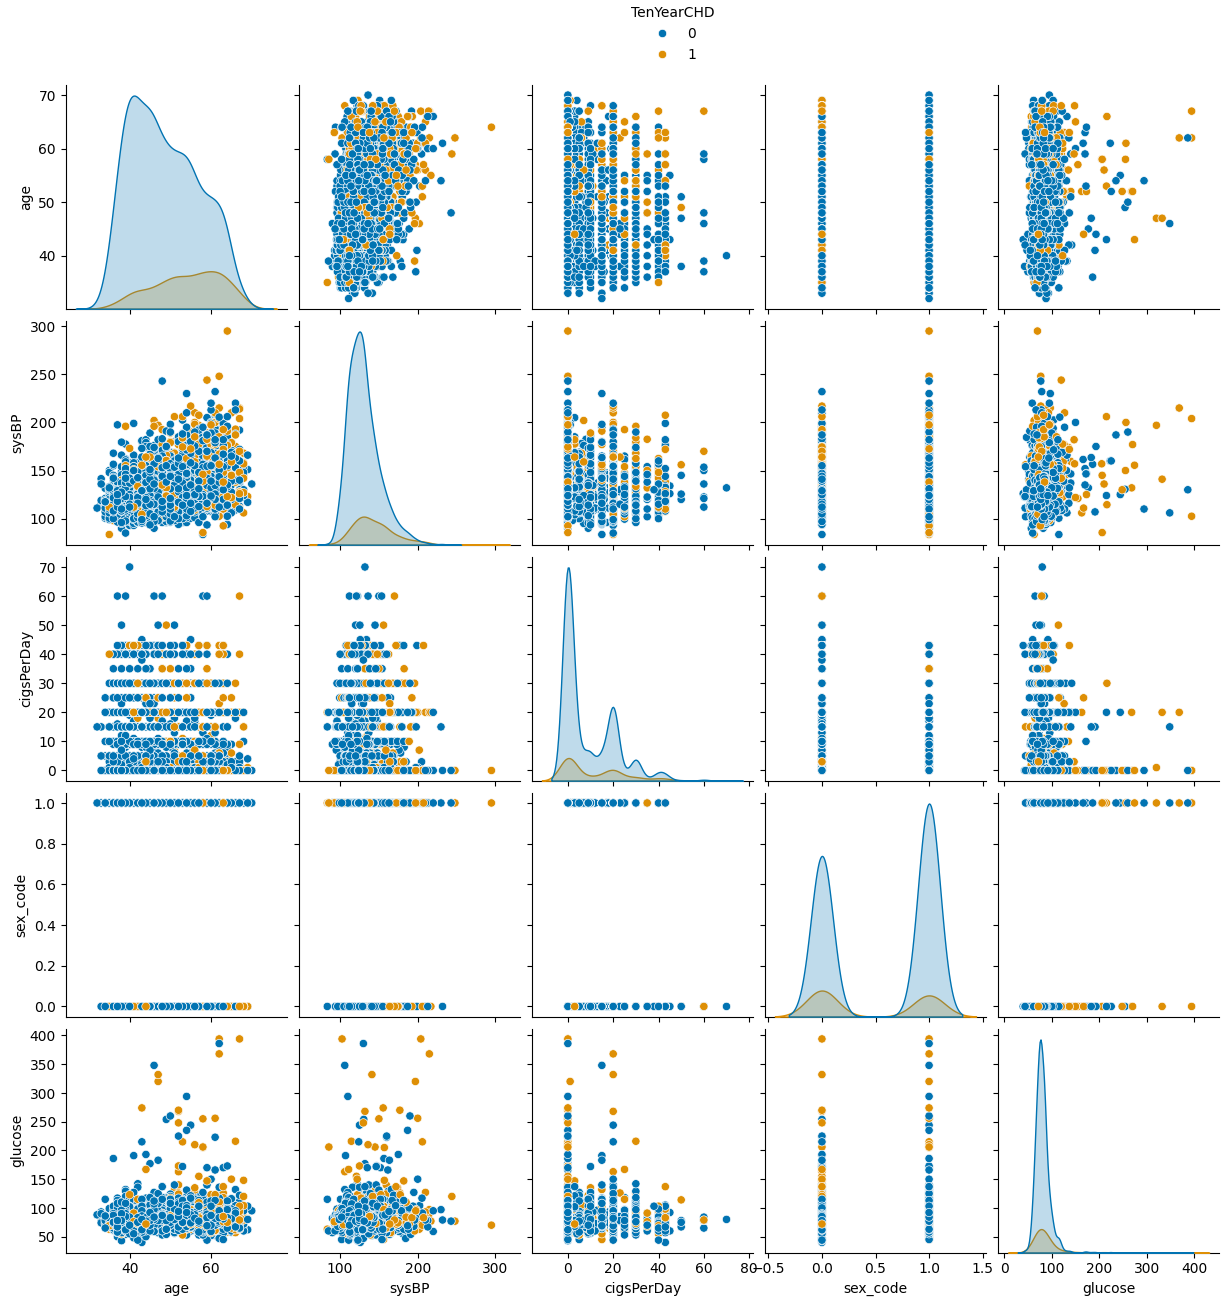

In [29]:
color_blind_friendly_palette = sns.color_palette("colorblind")
columns_of_interest = ['TenYearCHD', 'age', 'sysBP', 'cigsPerDay', 'sex_code', 'glucose']
filtered_df = cardio_df[columns_of_interest]

interestpairplot = sns.pairplot(filtered_df, hue='TenYearCHD', palette=color_blind_friendly_palette)

interestpairplot._legend.set_bbox_to_anchor((0.5, 1.05)) 
interestpairplot._legend.set_loc('upper center')

plt.show()

**Explore numerical values for median, mean etc. and determine significance of difference in variables of interest in groups with and without TenYearCHD risk using p values**

In [30]:
def calculate_summary_statistics(df, groupby_col, columns):
    summary_list = []
    
    for col in columns:
        summary = df.groupby(groupby_col)[col].agg(
            median=('median'),
            mean=('mean'),
            std=('std'),
            min=('min'),
            max=('max'),
            percentile_25=(lambda x: x.quantile(0.25)),
            percentile_75=(lambda x: x.quantile(0.75))
        ).reset_index()
        
        summary.columns = [groupby_col] + [f"{col}_{stat}" for stat in summary.columns[1:]]
        summary_list.append(summary)
    
    summary_df = summary_list[0]
    for df in summary_list[1:]:
        summary_df = summary_df.merge(df, on=groupby_col)
    
    return summary_df

columns_of_interest = ['age', 'sysBP', 'cigsPerDay', 'glucose']

summary_df = calculate_summary_statistics(cardio_df, 'TenYearCHD', columns_of_interest)

from IPython.display import display
display(summary_df)

for chd_status in summary_df['TenYearCHD']:
    print(f"\nSummary for TenYearCHD = {chd_status}")
    for column in columns_of_interest:
        stats = summary_df[summary_df['TenYearCHD'] == chd_status][[
            f"{column}_median", f"{column}_mean", f"{column}_std", f"{column}_min", f"{column}_percentile_25", f"{column}_percentile_75", f"{column}_max"
        ]].iloc[0]
        print(f"\n{column.capitalize()}:")
        print(f"  Median: {stats[f'{column}_median']:.2f}")
        print(f"  Mean: {stats[f'{column}_mean']:.2f}")
        print(f"  Std Dev: {stats[f'{column}_std']:.2f}")
        print(f"  Min: {stats[f'{column}_min']:.2f}")
        print(f"  25th Percentile: {stats[f'{column}_percentile_25']:.2f}")
        print(f"  75th Percentile: {stats[f'{column}_percentile_75']:.2f}")
        print(f"  Max: {stats[f'{column}_max']:.2f}")

for column in columns_of_interest:
    group0 = cardio_df[cardio_df['TenYearCHD'] == 0][column]
    group1 = cardio_df[cardio_df['TenYearCHD'] == 1][column]
    t_stat, p_val = ttest_ind(group0, group1, nan_policy='omit')
    print(f"\nT-test for {column}:")
    print(f"  T-statistic: {t_stat:.2f}")
    print(f"  P-value: {p_val:.5f}")


,TenYearCHD,age_median,age_mean,age_std,age_min,age_max,age_percentile_25,age_percentile_75,sysBP_median,sysBP_mean,...,cigsPerDay_max,cigsPerDay_percentile_25,cigsPerDay_percentile_75,glucose_median,glucose_mean,glucose_std,glucose_min,glucose_max,glucose_percentile_25,glucose_percentile_75
0,0,48.0,48.679230,8.402926,32,70,42.0,55.0,127.5,130.576364,...,70.0,0.0,20.0,78.0,80.617982,18.983717,40.0,386.0,71.0,86.0
1,1,55.0,54.214442,8.138735,35,69,48.0,61.0,139.0,143.823851,...,60.0,0.0,20.0,79.0,89.656455,41.852002,45.0,394.0,72.0,92.0



Summary for TenYearCHD = 0

Age:
  Median: 48.00
  Mean: 48.68
  Std Dev: 8.40
  Min: 32.00
  25th Percentile: 42.00
  75th Percentile: 55.00
  Max: 70.00

Sysbp:
  Median: 127.50
  Mean: 130.58
  Std Dev: 20.66
  Min: 83.50
  25th Percentile: 116.00
  75th Percentile: 141.00
  Max: 243.00

Cigsperday:
  Median: 0.00
  Mean: 8.74
  Std Dev: 11.65
  Min: 0.00
  25th Percentile: 0.00
  75th Percentile: 20.00
  Max: 70.00

Glucose:
  Median: 78.00
  Mean: 80.62
  Std Dev: 18.98
  Min: 40.00
  25th Percentile: 71.00
  75th Percentile: 86.00
  Max: 386.00

Summary for TenYearCHD = 1

Age:
  Median: 55.00
  Mean: 54.21
  Std Dev: 8.14
  Min: 35.00
  25th Percentile: 48.00
  75th Percentile: 61.00
  Max: 69.00

Sysbp:
  Median: 139.00
  Mean: 143.82
  Std Dev: 27.08
  Min: 83.50
  25th Percentile: 125.00
  75th Percentile: 158.00
  Max: 295.00

Cigsperday:
  Median: 5.00
  Mean: 10.95
  Std Dev: 13.02
  Min: 0.00
  25th Percentile: 0.00
  75th Percentile: 20.00
  Max: 60.00

Glucose:
  Media

C:\Users\sylvia.gitau\AppData\Local\Temp\ipykernel_13704\873279534.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=cardio_df, x='sex', hue='TenYearCHD', palette=color_blind_friendly_palette)


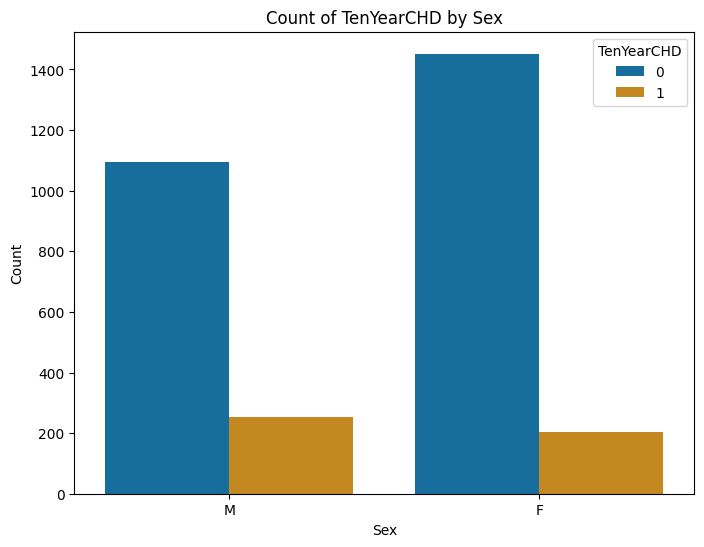

Percentage of males with TenYearCHD = 1: 18.71%
Percentage of females with TenYearCHD = 1: 12.37%


In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cardio_df, x='sex', hue='TenYearCHD', palette=color_blind_friendly_palette)
plt.title('Count of TenYearCHD by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='TenYearCHD')
plt.show()

total_males = cardio_df[cardio_df['sex'] == 'M'].shape[0]
total_females = cardio_df[cardio_df['sex'] == 'F'].shape[0]

males_with_chd = cardio_df[(cardio_df['sex'] == 'M') & (cardio_df['TenYearCHD'] == 1)].shape[0]
females_with_chd = cardio_df[(cardio_df['sex'] == 'F') & (cardio_df['TenYearCHD'] == 1)].shape[0]

percent_males_with_chd = (males_with_chd / total_males) * 100
percent_females_with_chd = (females_with_chd / total_females) * 100

print(f"Percentage of males with TenYearCHD = 1: {percent_males_with_chd:.2f}%")
print(f"Percentage of females with TenYearCHD = 1: {percent_females_with_chd:.2f}%")


In [32]:
columns_to_drop = ['sex', 'is_smoking', 'age_group']

cardio_df = cardio_df.drop(columns=[col for col in columns_to_drop if col in cardio_df.columns])

print(cardio_df.head())
print("\nRemaining columns:")
print(cardio_df.columns)

   age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  \
1   36         0.0     0.0                0             1         0    212.0   
2   46        10.0     0.0                0             0         0    250.0   
3   50        20.0     0.0                0             1         0    233.0   
4   64        30.0     0.0                0             0         0    241.0   
5   61         0.0     0.0                0             1         0    272.0   

   sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  sex_code  smoking_code  
1  168.0   98.0  29.77       72.0     75.0           0         0             0  
2  116.0   71.0  20.35       88.0     94.0           0         1             1  
3  158.0   88.0  28.26       68.0     94.0           1         0             1  
4  136.5   85.0  26.42       70.0     77.0           0         1             1  
5  182.0  121.0  32.80       85.0     65.0           1         1             0  

Remaining columns:
Index(['age',

## Insights 

## People with TenYearCHD risk have:

- **Higher median age**: 55 vs 48 in those without risk
- **Higher average age**: 54 vs 48 in those without risk

- **Higher median systolic blood pressure**: 139 vs 127.5 in those without risk
- **Higher average systolic blood pressure**: 143.8 vs 130.6 in those without risk

- **Higher median number of cigsPerDay**: 5 vs 0 in those without risk (meaning >50% of people without risk do not smoke)
- **Higher average number of cigsPerDay**: 10.95 vs 8.74 in those without risk

- **Slightly higher glucose but comparable**:
  - Median: 79 vs 78 in those without risk
  - Mean: 89.7 vs 80.6 in those without risk

- **Men are more likely to have risk of TenYearCHD**: 18.71% vs 12.37%

### P-values for differences in age, sysBP, cigsPerDay, and glucose between groups with and without TenYearCHD risk are all well below 0.05, indicating statistically significant differences between groups. Difference in glucose is less pronounced vs the other variables.




## Determining predictiveness using information value (IV)

**Indication for further exploration using IV**
While both IV and correlation coefficients are used to understand the relationships between variables, they serve different purposes and provide different insights. IV is more specific to binary classification and assesses the predictive power of a feature, whereas correlation coefficients measure the linear relationship between two continuous variables.

| IV value       | Predictiveness          |
|----------------|-------------------------|
| < 0.02 | Not useful for prediction |
| 0.02 to 0.1    | Weak predictive power    |
| 0.1 to 0.3     | Medium predictive power  |
| 0.3 to 1.0     | Strong predictive power  |
| > 1.0          | Very strong predictive power |


The following code calculates the Information Value (IV) for each feature in a DataFrame, which is used to assess the predictive power of features in binary classification problems.

In [ ]:
def calc_iv(df, feature, target, pr=0):
    lst = []
    epsilon = 1e-10  # Small constant to avoid division by zero

    for val in df[feature].unique():
        all_count = df[df[feature] == val].shape[0]
        bad_count = df[(df[feature] == val) & (df[target] == 1)].shape[0]
        lst.append([feature, val, all_count, bad_count])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    if data.empty:
        return np.nan

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum() + epsilon)
    data['Distribution Bad'] = data['Bad'] / (data['Bad'].sum() + epsilon)
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0] if not data.empty else np.nan

# Function to categorize IV value
def categorize_iv(iv_value):
    if np.isnan(iv_value):
        return 'Not calculable'
    elif iv_value < 0.02:
        return 'Not useful for prediction'
    elif iv_value < 0.10:
        return 'Weak predictive power'
    elif iv_value < 0.30:
        return 'Medium predictive power'
    elif iv_value < 1.00:
        return 'Strong predictive power'
    else:
        return 'Very strong predictive power'

# Calculate IV for each feature
iv_values = [calc_iv(cardio_df, col, 'TenYearCHD', pr=0) for col in cardio_df.columns]
features = cardio_df.columns

# Create DataFrame with results
woe_iv = pd.DataFrame({
    'Features': features,
    'IV': iv_values,
    'Predictiveness': [categorize_iv(iv) for iv in iv_values]
})

display(woe_iv)


C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sylvia.gitau\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, 

,Features,IV,Predictiveness
0,age,0.501529,Strong predictive power
1,cigsPerDay,0.065268,Weak predictive power
2,BPMeds,0.043863,Weak predictive power
3,prevalentStroke,0.014046,Not useful for prediction
4,prevalentHyp,0.197268,Medium predictive power
5,diabetes,0.054963,Weak predictive power
6,totChol,inf,Very strong predictive power
7,sysBP,inf,Very strong predictive power
8,diaBP,inf,Very strong predictive power
9,BMI,inf,Very strong predictive power


These results indicate age, totChol, sysBP, diaBP, BMI, and glucose may be considered for inclusion in the final model. However, these findings don't account for synergy and multicollinearity as previously discussed.

In [34]:
X = cardio_df.drop(columns=['TenYearCHD'])

## 4. Data Preparation: Split data

**Features I decided not to include in the final feature set:**

- **prevalentStroke** - not useful for prediction via information value 0.01
- **prevalentHyp** - strongly correlated with sysBP and sysBP has more specific information
- **diabetes** - weak predictive power, whereas glucose has very strong predictive power and is related to diabetes
- **smoking_code** - low predictive power and is redundant to cigsPerDay

## Designate final features for availability in model formation and split data 70% train vs 30% split

In [35]:
# Define the final feature set based on VIF results
final_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose', 'sex_code']

X = cardio_df[final_features]
y = cardio_df['TenYearCHD']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

print(f"Training set size: {train_x.shape[0]}")
print(f"Test set size: {test_x.shape[0]}")
print(f"Distribution in training set: {train_y.value_counts(normalize=True)}")
print(f"Distribution in test set: {test_y.value_counts(normalize=True)}")

Training set size: 2102
Test set size: 902
Distribution in training set: TenYearCHD
0    0.847764
1    0.152236
Name: proportion, dtype: float64
Distribution in test set: TenYearCHD
0    0.848115
1    0.151885
Name: proportion, dtype: float64


## Run Chi-Square test to determine if there are significant associations between features and TenYearCHD

In [36]:
bin_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']

for col in bin_columns:
    X.loc[:, col] = pd.cut(X[col], bins=10, labels=False)  # Binning into 10 categories

y = cardio_df['TenYearCHD']

chi2_values, p_values = chi2(X, y)

chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Value': chi2_values,
    'p-Value': p_values
})

print(chi2_df)


      Feature  Chi-Square Value       p-Value
0         age        196.238257  1.382823e-44
1  cigsPerDay         28.452377  9.603181e-08
2     totChol         12.032019  5.229440e-04
3       sysBP         81.089018  2.157757e-19
4     glucose         32.556483  1.157783e-08
5    sex_code         10.370729  1.280290e-03


### Chi-Square Test Results

All the features have p-values below the common significance level thresholds (0.05 or 0.01). This indicates that each feature is statistically significant in relation to the target variable `TenYearCHD`.

## Add Constant

Adding a constant aka intercept allows regression model to have a baseline value when all predictor variables are zero, improving model flexibility and accounting for bias

In [37]:
X = cardio_df[final_features]

X_constant = sm.add_constant(X)

print(X_constant.head())

   const  age  cigsPerDay  totChol  sysBP  glucose  sex_code
1    1.0   36         0.0    212.0  168.0     75.0         0
2    1.0   46        10.0    250.0  116.0     94.0         1
3    1.0   50        20.0    233.0  158.0     94.0         0
4    1.0   64        30.0    241.0  136.5     77.0         1
5    1.0   61         0.0    272.0  182.0     65.0         1


In [38]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2102, 6)
(2102,)
(902, 6)
(902,)


**Feature scaling**

Feature scaling is necessary to create consistency in feature ranges (since units and scales vary for example age in years, and blood pressure in mmHg). Without scaling, features with larger ranges or values can lead to biased model training by dominating those with smaller ranges, causing inaccurate weights

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [40]:
logreg = LogisticRegression()

**Explore model performance based on threshold setting**

## Metrics according to thresholds - cardio_df

In [41]:
X = cardio_df[final_features]
y = cardio_df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_test_pred_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.08, 0.10, 0.12, 0.14, 0.15, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

metrics_list = []

for threshold in thresholds:
    y_test_pred_optimal = (y_test_pred_prob >= threshold).astype(int)
    
    conf_matrix = confusion_matrix(y_test, y_test_pred_optimal)
    class_report = classification_report(y_test, y_test_pred_optimal, output_dict=True, zero_division=0)
    
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    accuracy = (TP + TN) / float(TP + TN + FP + FN)
    precision = TP / float(TP + FP) if (TP + FP) != 0 else 0
    recall = TP / float(TP + FN) if (TP + FN) != 0 else 0
    f1_score = class_report['1']['f1-score']
    specificity = TN / float(TN + FP) if (TN + FP) != 0 else 0
    
    type_1_error = FP  # False Positive
    type_2_error = FN  # False Negative
    
    metrics_list.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Specificity': specificity,
        'Type I Error (False Positive)': type_1_error,
        'Type II Error (False Negative)': type_2_error
    })

metrics_df = pd.DataFrame(metrics_list)

print(metrics_df)


    Threshold  Accuracy  Precision    Recall  F1-Score  Specificity  \
0        0.08  0.341098   0.168085  0.940476  0.285199     0.243714   
1        0.10  0.445923   0.194103  0.940476  0.321792     0.365571   
2        0.12  0.535774   0.212389  0.857143  0.340426     0.483559   
3        0.14  0.610649   0.230216  0.761905  0.353591     0.586074   
4        0.15  0.643927   0.242063  0.726190  0.363095     0.630561   
5        0.16  0.683860   0.263393  0.702381  0.383117     0.680851   
6        0.18  0.715474   0.267380  0.595238  0.369004     0.735010   
7        0.20  0.747088   0.284810  0.535714  0.371901     0.781431   
8        0.22  0.765391   0.288889  0.464286  0.356164     0.814313   
9        0.24  0.792013   0.315315  0.416667  0.358974     0.852998   
10       0.26  0.810316   0.325581  0.333333  0.329412     0.887814   
11       0.28  0.820300   0.323529  0.261905  0.289474     0.911025   
12       0.30  0.833611   0.351852  0.226190  0.275362     0.932302   
13    

## Insights based on threshold outcomes:

## **Ideal threshold to prioritize recall** / true positive rate / sensitivity **= 0.10:**

**Why prioritize recall:** Optimal for scenarios where detecting positive cases is crucial, such as coronary heart disease risk prediction, where missing a true positive is more detrimental than having some false positives. This model can be used as a screening tool to indicate whether further testing is indicated, likely avoiding a false diagnosis and unnecessary treatment. Furthermore, lifestyle changes that reduce risk of CHD are globally positive for physical and mental health such as exercise and optimizing nutrition. In this way, impact of a false positive could actually benefit a patient who decides to undergo healthy lifestyle changes based on the model prediction.

- **Accuracy**: 0.445923 
- **Precision**: 0.194103  
- **Recall**: 0.940476  
- **F1-Score**: 00.321792  
- **Specificity**: 0.365571 
- **Type I Error (False Positive)**: 328  
- **Type II Error (False Negative)**: 5

Setting the threshold at 0.10 is justified if the goal is to prioritize recall and minimize false negatives. The high recall rate ensures that nearly all individuals with coronary heart disease are identified, which is paramount for timely and potentially life-saving medical intervention. While this increases the number of false positives, the benefits of catching almost all true cases of the disease far outweigh the costs of additional testing and follow-up on the false positives.

### Contextual Considerations

#### Primary Goal - Minimizing False Negatives:

The primary goal in medical diagnosis, especially for a condition as serious as coronary heart disease, is to minimize false negatives. Missing a positive case can lead to serious health consequences, so a high recall is crucial.

#### High Recall (94.05%):

A recall of 94.05% means that the model correctly identifies 94.05% of all actual positive cases. This is very high and critical in the medical field where early detection can significantly affect outcomes.

#### False Positives vs. False Negatives:

In this scenario, false positives (type I errors) lead to additional testing and follow-up, which, while resource-intensive, are less harmful than missing a diagnosis (false negatives). Therefore, a higher number of false positives can be tolerated.

### Balancing F1 Score and Medical Context:

- **F1 Score**: Combines precision and recall. While precision is low, the high recall in this medical context is more important.
- **Precision**: At 19.41%, it indicates many false positives. In medical settings, this means more people will undergo further testing, which can be costly and cause anxiety but is generally safer than missing cases.
- **Specificity**: At 36.56%, it indicates a lower ability to correctly identify true negatives, contributing to more false positives.

### Argument for Acceptability:

#### Criticality of False Negatives:

In medical diagnosis, especially for severe conditions like coronary heart disease, the cost of false negatives is very high. Therefore, having a high recall is paramount, even at the expense of precision and F1 score.

#### Resource Allocation:

While the healthcare system will need to handle more false positives, this can be managed with proper resource allocation. The trade-off is acceptable because it prevents missing true cases, which could lead to severe health implications.

#### Clinical Follow-Up:

Patients flagged by the model can undergo further clinical evaluation. The initial screening tool (your model) prioritizes sensitivity (recall), and subsequent more precise tests can mitigate the false positives.

### Conclusion:

An F1 score of 0.322, while not ideal, is acceptable in the context of coronary heart disease prediction where the primary objective is to minimize false negatives. The high recall rate justifies the lower precision and F1 score because it ensures that nearly all patients with the condition are identified for further testing and treatment. The trade-off is between the high cost of missing a diagnosis and the manageable cost of additional follow-up for false positives.


## Ideal threshold to prioritize precision aka positive predictive value (PPV) AND specificity aka true negative rate  = **0.48:**

**Why prioritize precision:** Ideal for scenarios where minimizing false positives is crucial, such as avoiding anxiety and unnecessary interventions or treatments in coronary heart disease prediction.

- **Accuracy**: 0.863561 
- **Precision**: 1.000000  
- **Recall**: 0.023810  
- **F1-Score**: 0.046512  
- **Specificity**: 1.000000  
- **Type I Error (False Positive)**: 0  
- **Type II Error (False Negative)**: 82

### Contextual Considerations

### Balancing Precision and Specificity in Medical Context:

- **Precision (1.000000)**: A precision of 1.000000 indicates that all patients identified as high risk are indeed at high risk. This ensures that no patients are incorrectly flagged as high risk, reducing unnecessary anxiety and avoiding unwarranted medical interventions.
- **Specificity (1.000000)**: A specificity of 1.000000 means that all patients who are not at risk are correctly identified as not at risk. This minimizes the number of false positives, ensuring that only those truly at risk are subjected to further testing or treatment.

### Argument for Acceptability:

#### Minimizing False Positives:

- **Avoid Unnecessary Anxiety**: False positives can cause significant anxiety and stress for patients. By prioritizing precision, we ensure that only those who truly need further evaluation are flagged, reducing undue stress.
- **Resource Allocation**: In a healthcare setting, resources such as time, personnel, and money are limited. High precision ensures that resources are directed towards those who truly need them, avoiding the wastage of resources on patients who do not require further intervention.
- **Avoid Unnecessary Treatments**: Unnecessary medical interventions can sometimes lead to additional health complications. High precision helps in avoiding these unnecessary treatments and their associated risks.

#### Ensuring True Negative Rate:

- **Building Trust**: High specificity builds trust in the screening process. Patients who are told they are not at risk can be confident in that assessment, knowing the screening process has a very low chance of incorrectly identifying them as at risk.
- **Reducing Healthcare Burden**: High specificity reduces the burden on healthcare systems by ensuring that only those who need follow-up tests and treatments receive them. This is especially important in scenarios where healthcare systems are stretched thin.

### Conclusion:

Setting the threshold at 0.48 prioritizes precision and specificity, ensuring that patients flagged as high risk for coronary heart disease truly need further medical evaluation. This approach minimizes false positives, reducing unnecessary anxiety, interventions, and resource allocation, while maintaining trust in the screening process. Although recall is low, the benefits of high precision and specificity make this threshold suitable for scenarios where minimizing false positives is critical.


### Recommedation based on the above findings: 

- **Confirmatory Screening**: In a **two-step screening process**, an initial broad screening test with high recall/sensitivity (threshold at 0.10) could be used to catch as many potential cases as possible (minimizing false negatives). Subsequently, a highly specific test (like the model at threshold 0.48) can be employed to identify those who actually do not have risk, thus minimizing false positives from the initial screening.

## 5. Training the Model: Application of Model to Test Data Set

**Using Threshold of 0.10 to prioritize Recall**

In [42]:
X = cardio_df[final_features]
y = cardio_df['TenYearCHD']

Logistic Regression Model with Final Features and Threshold 0.1:
Accuracy: 0.5322
Recall: 0.8394
Precision: 0.2233
F1-Score: 0.3528
Specificity: 0.4771
Type I Error (False Positive): 400
Type II Error (False Negative): 22

Logistic Regression Coefficients:
age: 0.5593
cigsPerDay: 0.2600
totChol: 0.1422
sysBP: 0.3776
glucose: 0.2272
sex_code: -0.2517

Intercept: -1.9960

Logistic Regression Equation:
Logit(p) = -1.9960 + (0.5593 * age) + (0.2600 * cigsPerDay) + (0.1422 * totChol) + (0.3776 * sysBP) + (0.2272 * glucose) + (-0.2517 * sex_code)


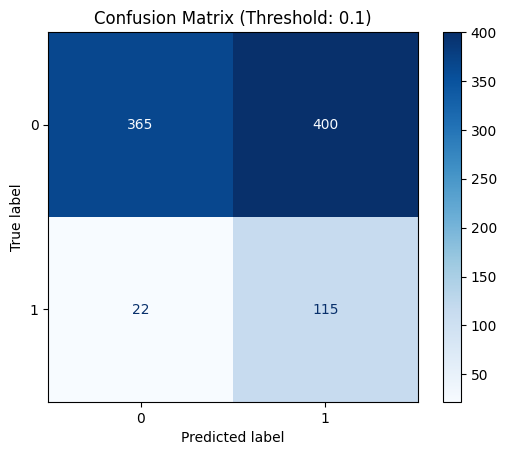

In [45]:
threshold = 0.10

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x, train_y)

y_pred_prob = log_reg.predict_proba(test_x)[:, 1]  

y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp  # False Positive
type_2_error = fn  # False Negative

print(f"Logistic Regression Model with Final Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(final_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(final_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)

conf_matrix = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.show()

Summary of differences: Train vs. Test outcomes with 0.10 threshold:

## Training vs Test Outcomes for Logistic Regression Model at Threshold 0.10

| Metric                         | Training Data | Test Data  |
|-------------------------------|---------------|------------|
| **Accuracy**                  | 0.4459        | 0.5322     |
| **Precision**                 | 0.1941        | 0.2233     |
| **Recall**                    | 0.9405        | 0.8394     |
| **F1-Score**                  | 0.3218        | 0.3528     |
| **Specificity**               | 0.3656        | 0.4771     |
| **Type I Error (False Positive)** | 328           | 400        |
| **Type II Error (False Negative)** | 5             | 22         |

Accuracy, precision, F1-Score and specificity improved, while recall decreased, # of type I and II errors increased

## Training the Model: Application of Model to Test Data Set

**Using Threshold of 0.48 to prioritize Precision and Specificity**

Logistic Regression Model with Final Features and Threshold 0.48:
Accuracy: 0.8481
Recall: 0.0511
Precision: 0.5000
F1-Score: 0.0927
Specificity: 0.9908
Type I Error (False Positive): 7
Type II Error (False Negative): 130

Logistic Regression Coefficients:
age: 0.5593
cigsPerDay: 0.2600
totChol: 0.1422
sysBP: 0.3776
glucose: 0.2272
sex_code: -0.2517

Intercept: -1.9960

Logistic Regression Equation:
Logit(p) = -1.9960 + (0.5593 * age) + (0.2600 * cigsPerDay) + (0.1422 * totChol) + (0.3776 * sysBP) + (0.2272 * glucose) + (-0.2517 * sex_code)


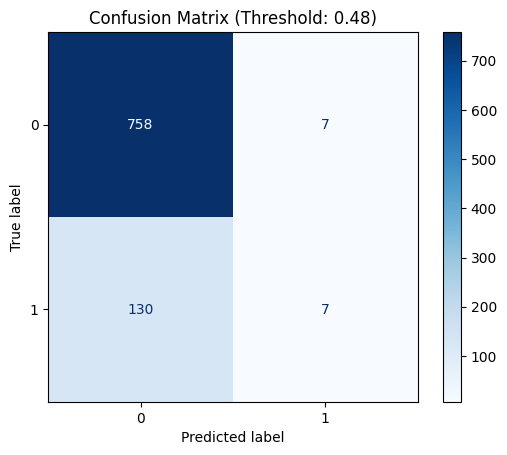

In [46]:
threshold = 0.48

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x, train_y)

y_pred_prob = log_reg.predict_proba(test_x)[:, 1]  

y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp  # False Positive
type_2_error = fn  # False Negative

print(f"Logistic Regression Model with Final Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(final_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(final_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)

conf_matrix = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.show()


Summary of differences: Train vs. Test outcomes with 0.48 threshold:

| Metric                         | Training Data | Test Data  |
|-------------------------------|---------------|------------|
| **Accuracy**                  | 0.8636        | 0.8481     |
| **Precision**                 | 1.0000        | 0.5000     |
| **Recall**                    | 0.0238        | 0.0511     |
| **F1-Score**                  | 0.0465        | 0.0927     |
| **Specificity**               | 1.0000        | 0.9908     |
| **Type I Error (False Positive)** | 0             | 7          |
| **Type II Error (False Negative)** | 82            | 130        |

Recall and F1-Score showed slight improvement while accuracy, precision, specificity decreased and # of type I and II errors increased

## Logistic Regression Equation for Threshold 0.10

Logit(p) = -1.9960 + (0.5593 * age) + (0.2600 * cigsPerDay) + (0.1422 * totChol) + (0.3776 * sysBP) + (0.2272 * glucose) + (-0.2517 * sex_code)

## Logistic Regression Equation for Threshold 0.48

Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)

## 6. Insights and Conclusions

#### 1. **Threshold 0.10**:
- **Performance Metrics**:
  - **Accuracy**: 53.22% - The model correctly classified just over half of the instances.
  - **Recall**: 83.94% - The model captures most true positive cases of coronary heart disease (CHD), minimizing false negatives. This is crucial for detecting high-risk individuals.
  - **Precision**: 22.33% - Out of the predicted positive cases, only a small percentage are truly positive. This indicates a high false positive rate.
  - **F1-Score**: 35.28% - The balance between precision and recall is modest but emphasizes the model's ability to identify high-risk cases.
  - **Specificity**: 47.71% - The model struggles to correctly identify true negatives, leading to a high false positive count.
  - **Type I Error**: 400 - Many false positives.
  - **Type II Error**: 22 - Few false negatives.

- **Key Observations**:
  - This threshold is designed for **high sensitivity**, ensuring most at-risk individuals are flagged.
  - The trade-off is **lower precision and specificity**, meaning many low-risk individuals may be falsely classified as high risk.

- **Use Case**:
  - This threshold is appropriate in contexts where **missing high-risk cases (false negatives)** is more costly than the burden of false positives, such as preventive health programs or early CHD interventions.

#### 2. **Threshold 0.48**:
- **Performance Metrics**:
  - **Accuracy**: 84.81% - The model correctly classifies the majority of instances, with much better performance than the 0.10 threshold.
  - **Recall**: 5.11% - The model misses most true positive cases, with a very high false negative rate.
  - **Precision**: 50.00% - Out of the predicted positive cases, half are truly positive, indicating better handling of false positives.
  - **F1-Score**: 9.27% - The balance between precision and recall is very poor due to the extremely low recall.
  - **Specificity**: 99.08% - The model excels at identifying true negatives, significantly reducing false positives.
  - **Type I Error**: 7 - Very few false positives.
  - **Type II Error**: 130 - A large number of false negatives.

- **Key Observations**:
  - This threshold prioritizes **high specificity**, ensuring that most low-risk individuals are correctly classified.
  - The trade-off is **very low recall**, meaning many high-risk individuals are missed.

- **Use Case**:
  - This threshold is suitable when **overdiagnosis or unnecessary interventions** are costly or undesirable, such as in resource-constrained settings where follow-up testing or treatments are expensive.

#### 3. **Comparative Insights**:
- **Same Logistic Regression Model**: 
  - The coefficients and intercept are identical across both thresholds. The model itself remains unchanged; the difference lies in the **classification threshold**, which adjusts the trade-off between sensitivity and specificity.
  
- **Threshold Selection**:
  - Threshold 0.10: Prioritizes **recall**, making it better suited for scenarios where failing to detect CHD cases is critical.
  - Threshold 0.48: Prioritizes **specificity**, making it better suited for scenarios where minimizing false positives is critical.

#### 4. **Recommendations**:
- For a **public health setting** or preventive CHD risk assessment, use **threshold 0.10** to ensure high-risk cases are not missed.
- For a **clinical setting** where precision is important and follow-up testing is expensive, use **threshold 0.48** to reduce false positives while accepting lower recall.

#### 5. **General Conclusion**:
- Adjusting the threshold significantly impacts model performance metrics. This flexibility allows the same logistic regression model to be adapted for different decision-making priorities based on the context and goals of the analysis.

## Recommendations for Model Improvement

### Increasing Sample Size / Data Set
- **Larger Sample Size**: One of the most straightforward ways to improve the model is to increase the sample size. A larger dataset can help the model learn more patterns and generalize better to unseen data.
  - **Benefit**: Reduces the variance and helps in better estimation of the model parameters, thus improving both recall and specificity.
  - **Action**: Collect more data from diverse sources, ensuring it is representative of the population to be modeled.

### Feature Engineering
- **Additional Features**: Introducing new features or improving existing ones can help the model capture more relevant information.
  - **Benefit**: Better features can improve the model's predictive power and accuracy.
  - **Action**: Consider domain-specific features, such as additional lifestyle factors or other medical tests.

